## Самостоятельная реализация свертки

In [1]:
import torch
from torch import nn
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
def corr2d(X, K):  
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [3]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.Tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

### Фильтры

In [4]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [5]:
# вертикальные грани есть
K = torch.Tensor([[1, -1]])
Y = corr2d(X, K)
print(X)
print(Y)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


In [6]:
# вертикальных граней нет
Z = corr2d(X.T, K)
print(X.T)
print(Z)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [7]:
import cv2
import numpy as np
import scipy.datasets
ascent = scipy.datasets.ascent()
#from scipy import misc
#img = misc.ascent()
img = torch.Tensor(ascent)

In [8]:
img_transformed = torch.clone(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

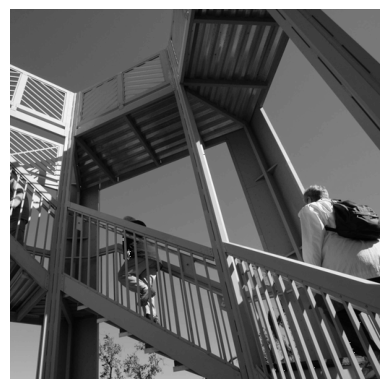

In [9]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()


**Усредняющий фильтр**

In [10]:
filter_ = torch.tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
print(filter_.shape)
filter_

torch.Size([3, 3])


tensor([[0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]])

In [11]:
def apply_filter(img, filter_):
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            convolution = 0.0

            dimg = img[x-1:x+2, y-1:y+2] 
            convolution = torch.sum(dimg * filter_)

            if convolution < 0:
                convolution = 0
            if convolution > 255:
                convolution = 255
            img_transformed[x, y] = convolution
    return img_transformed

In [12]:
def plot_image(img, img_transformed):
    # Plot the image. 512 by 512
    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(img_transformed)
    #plt.axis('off')
    plt.show()

    ymin,ymax,xmin,xmax = 100,200,0,100

    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img[ymin:ymax,xmin:xmax])
    plt.subplot(1,2,2)
    plt.imshow(img_transformed[ymin:ymax,xmin:xmax])
    #plt.axis('off')
    plt.show() 

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\17146804.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


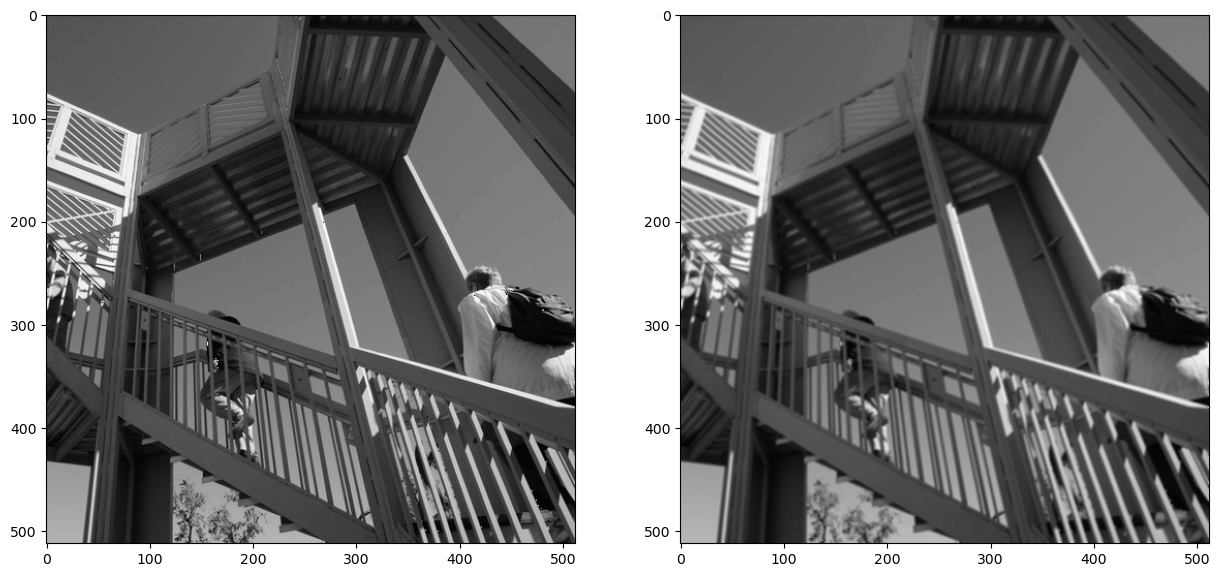

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\17146804.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


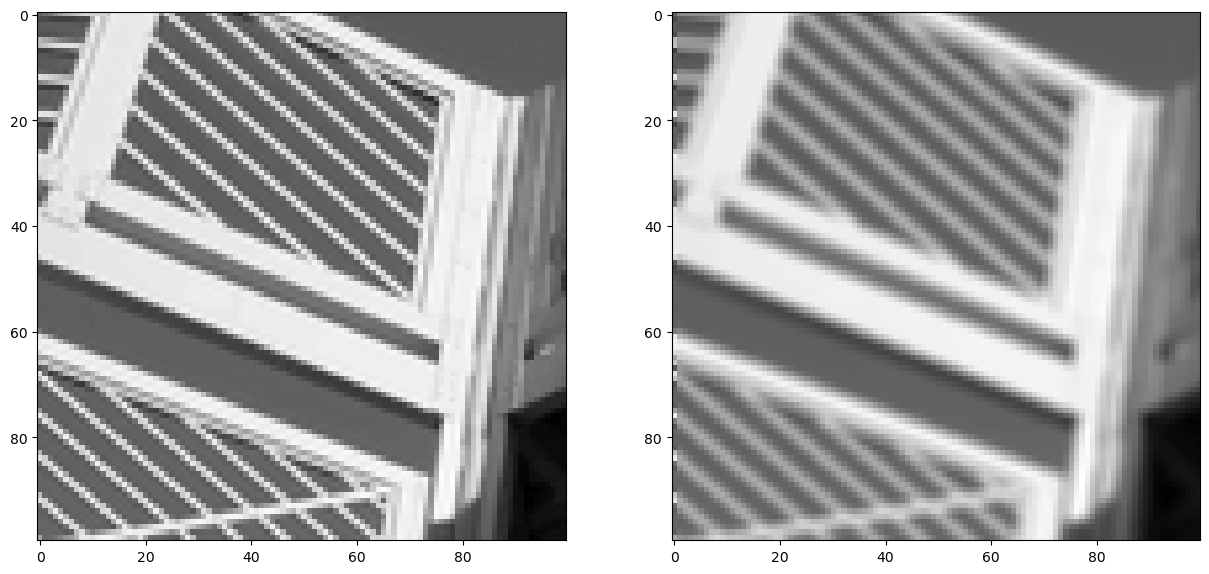

In [13]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Фильтр улучшения чёткости**

In [14]:
filter_ = torch.tensor([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
print(filter_.shape)
filter_

torch.Size([3, 3])


tensor([[-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]])

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\17146804.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


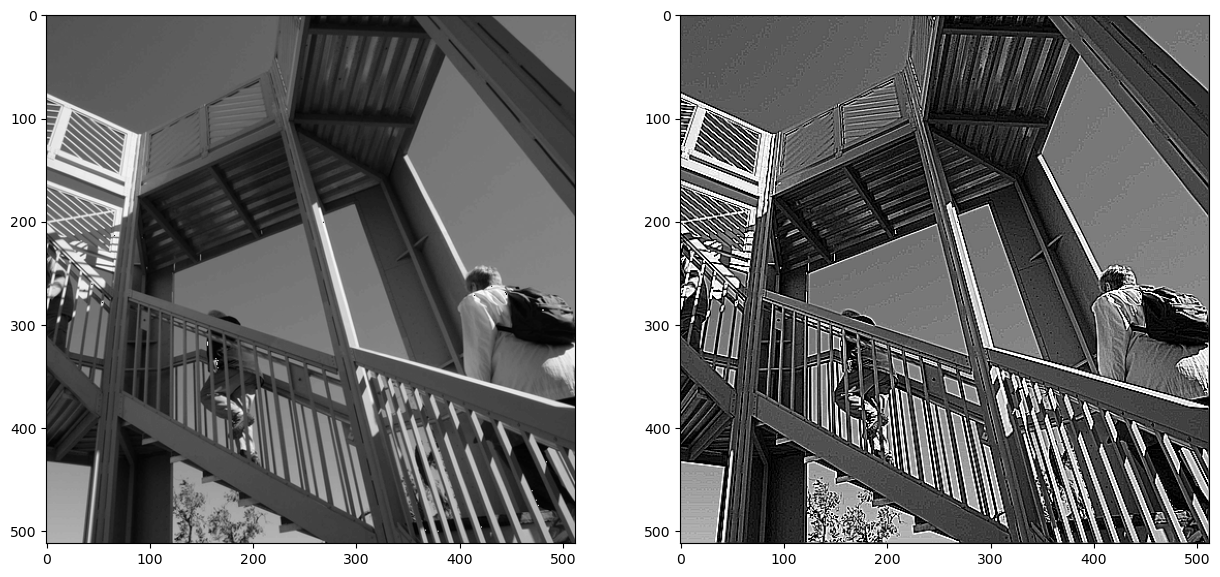

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\17146804.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


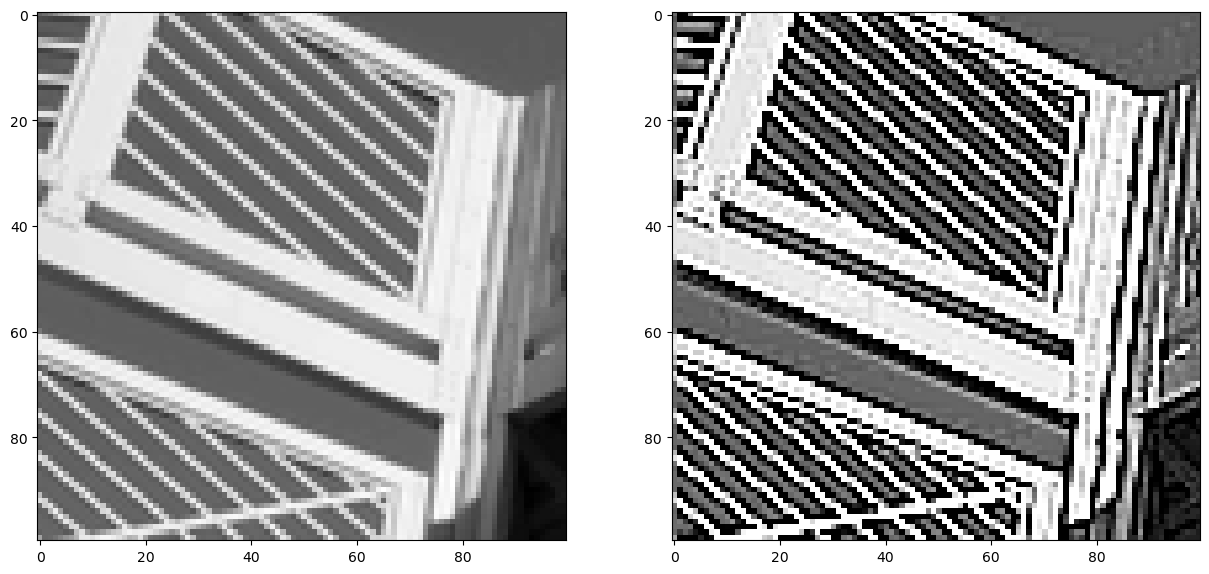

In [15]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Обнаружение линий по горизонтали**

In [16]:
filter_ = torch.tensor([[-1, -1, -1], [2,  2,  2], [-1, -1, -1]])
print(filter_.shape)
filter_

torch.Size([3, 3])


tensor([[-1, -1, -1],
        [ 2,  2,  2],
        [-1, -1, -1]])

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\17146804.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


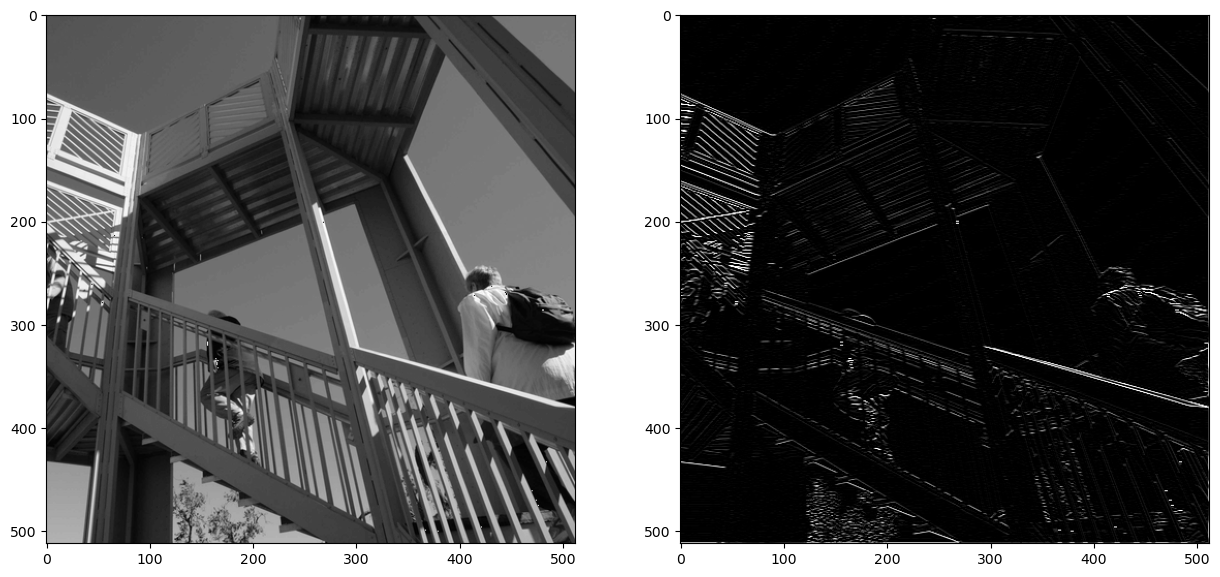

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\17146804.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


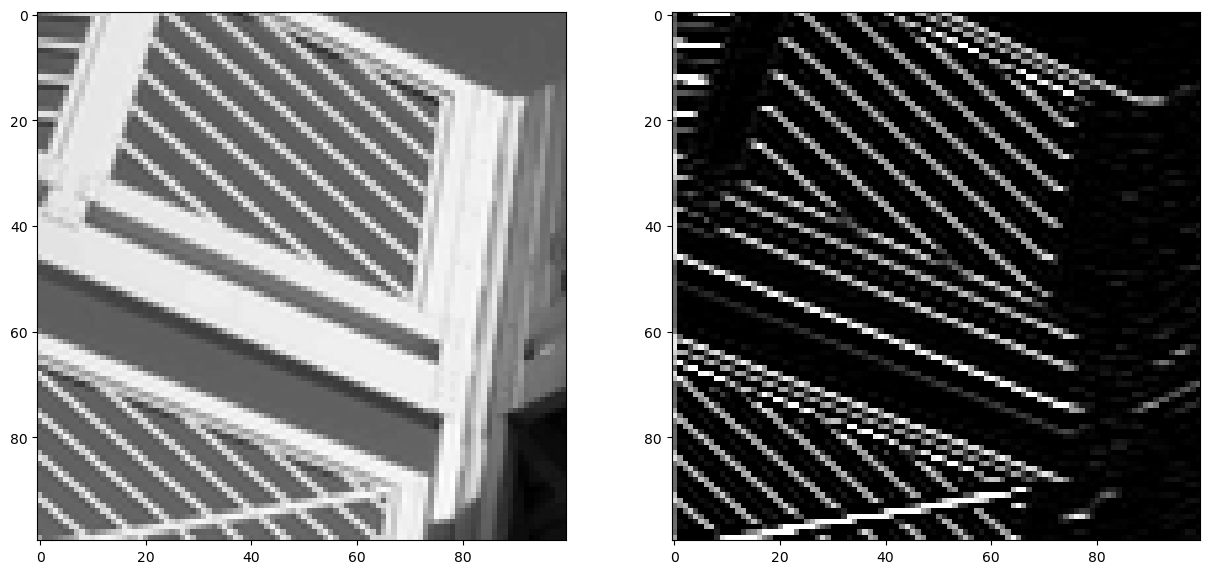

In [17]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

## Сверточный слой

In [18]:
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)
X

tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.]]]])

In [19]:
Y

tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]])

In [20]:
conv2d = torch.nn.Conv2d(in_channels=1,
                         out_channels=1,
                         kernel_size=(1,2))

In [21]:
optimizer = torch.optim.SGD(conv2d.parameters(), lr=0.1)

In [22]:
criterion = nn.MSELoss()

In [23]:
for i in range(200):
    optimizer.zero_grad()
    Y_hat = conv2d(X)
    l = criterion(Y_hat,Y)
    l.backward()
    optimizer.step()
    if (i + 1) % 10 == 0:
        print(f'batch {i + 1}, loss {l.item():.3f}')

batch 10, loss 0.385
batch 20, loss 0.215
batch 30, loss 0.120
batch 40, loss 0.067
batch 50, loss 0.037
batch 60, loss 0.021
batch 70, loss 0.012
batch 80, loss 0.007
batch 90, loss 0.004
batch 100, loss 0.002
batch 110, loss 0.001
batch 120, loss 0.001
batch 130, loss 0.000
batch 140, loss 0.000
batch 150, loss 0.000
batch 160, loss 0.000
batch 170, loss 0.000
batch 180, loss 0.000
batch 190, loss 0.000
batch 200, loss 0.000


In [24]:
print(conv2d.weight)
print(conv2d.bias)

Parameter containing:
tensor([[[[ 0.9955, -0.9955]]]], requires_grad=True)
Parameter containing:
tensor([-9.4004e-06], requires_grad=True)


## Padding и stride

In [25]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [26]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 4, 4])

## Каналы

In [27]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [28]:
conv2d.weight.shape

torch.Size([1, 1, 3, 3])

In [29]:
conv2d = nn.Conv2d(3, 32, kernel_size=3, padding=1)
X = torch.randn((1, 3, 8, 8))
conv2d(X).shape

torch.Size([1, 32, 8, 8])

In [30]:
conv2d.weight.shape

torch.Size([32, 3, 3, 3])

## Pooling

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\1096728076.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


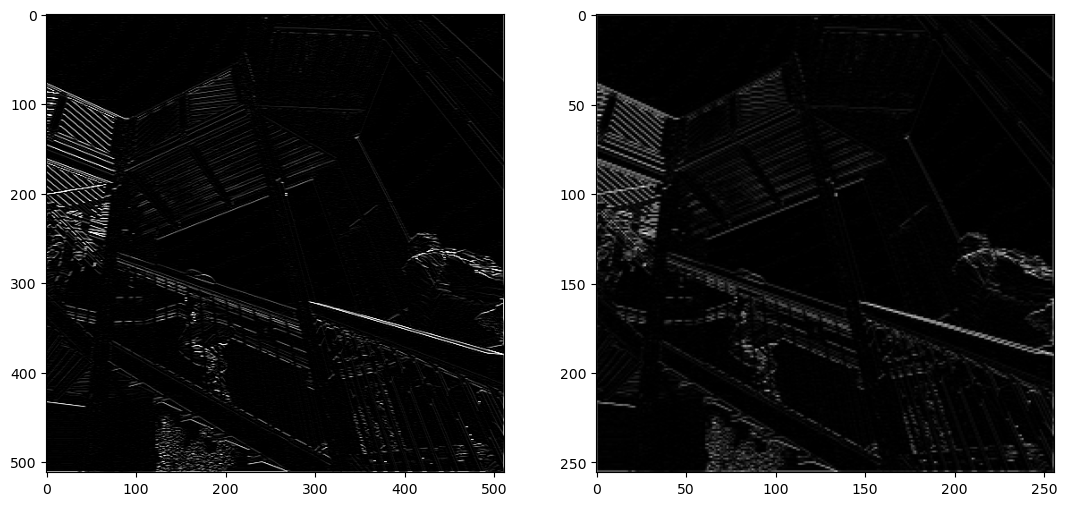

In [31]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.mean(pixels)


plt.figure(figsize=(13,6))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

C:\Users\A.Stolbov\AppData\Local\Temp\ipykernel_8740\513734640.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


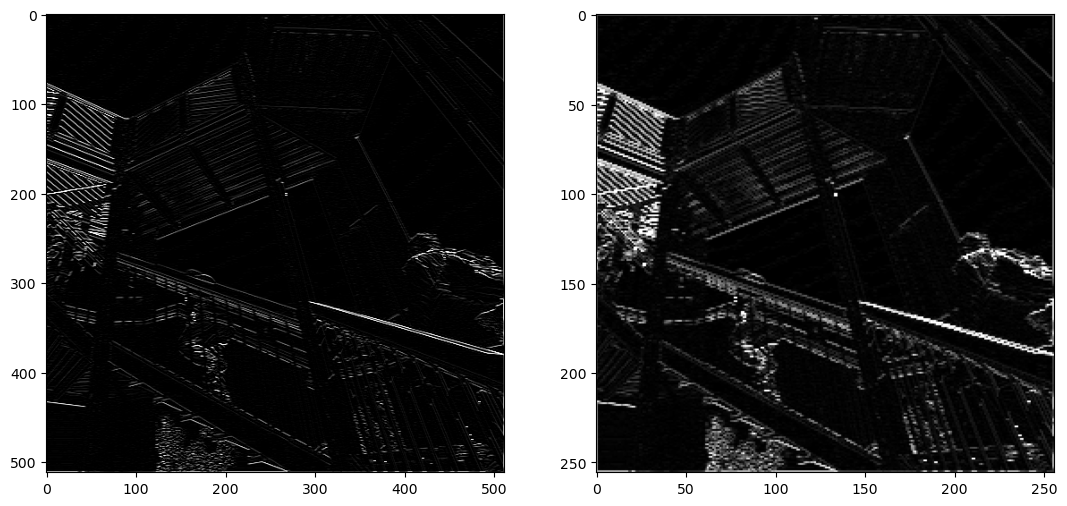

In [32]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.max(pixels)


plt.figure(figsize=(13,6))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

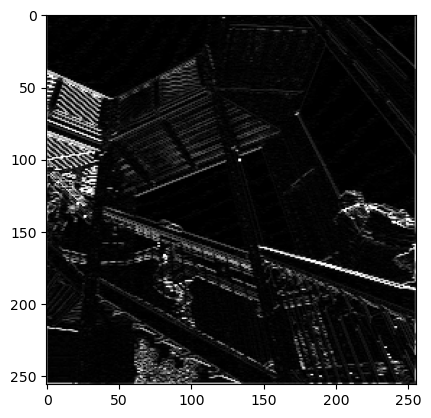

In [33]:
pool2d = nn.MaxPool2d(2)
x = pool2d(img_transformed[None])[0]
plt.imshow(x);

In [34]:
X = torch.arange(16).reshape((1, 1, 4, 4)).type(torch.float)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [35]:
pool2d = nn.MaxPool2d(2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [36]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [37]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [38]:
pool2d = nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [39]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [40]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## Lenet

In [41]:
import torchvision as tv
import time
import matplotlib.pyplot as plt

In [42]:
BATCH_SIZE = 256

In [43]:
transforms = tv.transforms.Compose([
    tv.transforms.Resize(32),
    tv.transforms.ToTensor()
])

In [44]:
train_dataset = tv.datasets.MNIST('.',
                                  train=True,
                                  transform=transforms,
                                  download=True)

test_dataset = tv.datasets.MNIST('.',
                                 train=False,
                                 transform=transforms,
                                 download=True)

train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

100.0%


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100.0%


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100.0%


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100.0%


Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [66]:
train_dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 5)

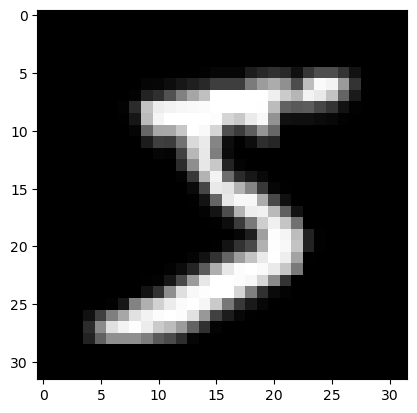

In [71]:
plt.imshow(train_dataset[0][0].numpy().reshape(32,32), cmap='gray');

In [47]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(16, 120, kernel_size=5),
    nn.Flatten(),
    nn.Linear(120, 84),
    nn.Tanh(),
    nn.Linear(84, 10)
)

In [48]:
from torchsummary import summary

summary(model, input_size=(1, 32, 32), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
           Flatten-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

In [49]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 32, 32)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 32, 32])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 6, 28, 28])
Layer Tanh(). X shape: torch.Size([1, 6, 28, 28])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 16, 10, 10])
Layer Tanh(). X shape: torch.Size([1, 16, 10, 10])
Layer AvgPool2d(kernel_size=2, stride=2, padding=0). X shape: torch.Size([1, 16, 5, 5])
Layer Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 120, 1, 1])
Layer Flatten(start_dim=1, end_dim=-1). X shape: torch.Size([1, 120])
Layer Linear(in_features=120, out_features=84, bias=True). X shape: torch.Size([1, 84])
Layer Tanh(). X shape: torch.Size([1, 84])
Layer Linear(in_features=84, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [50]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 32, 32)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [51]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [52]:
def train(net, train_iter, test_iter, optimizer, num_epochs):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    
        test_acc = evaluate_accuracy(test_iter, net)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [53]:
lr, num_epochs = 0.01, 5
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, optimizer, num_epochs)

epoch 1, loss 0.0089, train acc 0.225, test acc 0.500, time 20.4 sec
epoch 2, loss 0.0080, train acc 0.612, test acc 0.658, time 20.1 sec
epoch 3, loss 0.0048, train acc 0.709, test acc 0.784, time 19.9 sec
epoch 4, loss 0.0029, train acc 0.812, test acc 0.842, time 20.0 sec
epoch 5, loss 0.0023, train acc 0.848, test acc 0.865, time 20.2 sec


## Обучение на GPU

Как подключить GPU почитать [здесь (на английском)](https://www.marktechpost.com/2021/01/09/getting-started-with-pytorch-in-google-collab-with-free-gpu/) и [здесь (на русском)](https://medium.com/@janpoleszczuk/%D0%BF%D0%B5%D1%80%D0%B2%D1%8B%D0%B5-%D1%88%D0%B0%D0%B3%D0%B8-%D0%B2-google-colab-9cd511581cd6)

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [55]:
model = model.to(device)

In [56]:
def train(net, train_iter, test_iter, optimizer, num_epochs, device):
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
    
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    
        test_acc = evaluate_accuracy(test_iter, net, device)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}' \
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [57]:
def evaluate_accuracy(data_iter, net, device):
    acc_sum, n = torch.Tensor([0]).to(device), 0
    for X, y in data_iter:
        X, y = X.to(device), y.to(device)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [59]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, device)

epoch 1, loss 0.0019, train acc 0.867, test acc 0.872, time 12.8 sec
epoch 2, loss 0.0019, train acc 0.868, test acc 0.875, time 12.3 sec
epoch 3, loss 0.0019, train acc 0.870, test acc 0.876, time 13.3 sec
epoch 4, loss 0.0018, train acc 0.871, test acc 0.877, time 14.7 sec
epoch 5, loss 0.0018, train acc 0.872, test acc 0.878, time 14.7 sec
